<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/cnn/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime

In [42]:
import tensorflow as tf
from os import path, getcwd, chdir
path = f"{getcwd()}/mnist.npz"
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

time: 1.37 ms


In [134]:
# def train_mnist_conv():  
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
      if logs.get('accuracy')>=0.998:
          self.model.stop_training = True

callbacks = Mycallback() 

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.


time: 374 ms


In [116]:
cat_training_labels = tf.keras.utils.to_categorical(
    training_labels, num_classes=10, dtype='float32'
)
cat_test_labels = tf.keras.utils.to_categorical(
    test_labels, num_classes=10, dtype='float32'
)

time: 3.58 ms


In [129]:
training_labels[0]

5

time: 3.21 ms


In [136]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(3,3),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    training_images,training_labels,validation_split = 0.2,epochs=40 ,callbacks =[callbacks]
)
print(model.evaluate(test_images, test_labels))
# return history.epoch, history.history['accuracy'][-1]
%load_ext autotime

Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4286 - accuracy: 0.8615 - val_loss: 0.0973 - val_accuracy: 0.9707
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1697 - accuracy: 0.9481 - val_loss: 0.0828 - val_accuracy: 0.9750
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1349 - accuracy: 0.9582 - val_loss: 0.0628 - val_accuracy: 0.9819
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1184 - accuracy: 0.9630 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1077 - accuracy: 0.9665 - val_loss: 0.0528 - val_accuracy: 0.9851
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1001 - accuracy: 0.9691 - val_loss: 0.0482 - val_accuracy: 0.9855
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0932 - accuracy: 0.9721 - val_loss: 0.0418 - val_accuracy:

In [137]:
test_history = model.evaluate(x=test_images,y=test_labels )
%load_ext autotime

313/313 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.9916
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 730 ms


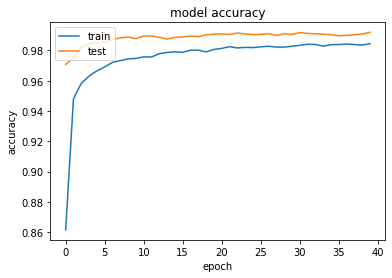

time: 150 ms


In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [98]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 26, 26, 512)       5120      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 11, 11, 256)       1179904   
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 9, 9, 32)          73760     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)             

#Cross validation

In [ ]:
X = np.concatenate(training_images,test_images)
X.shape

In [ ]:

seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

cvscores = []
step = 0
for train, test in kfold.split(X, Y):	
  model.fit(X[train], Y[train], epochs=25, verbose=0)
  scores = model.evaluate(X[test], Y[test], verbose=0)
  print("step {0} ----- {1} is {2}".format(step,model.metrics_names[1], scores[1]*100))
  step += 1
  cvscores.append(scores[1] * 100)
print("The average of the model accuracy is {0} (+/- {1})".format(np.mean(cvscores), np.std(cvscores)))